In [1]:
import pandas as pd
import sklearn as sk

In [2]:
CQI_dataset = pd.read_csv('arabica_data_cleaned.csv')

# Brainstorm:

https://towardsdatascience.com/a-review-of-coffee-data-grades-and-flavors-5ccb6fc51941
https://www.kaggle.com/reminho/coffee-quality-score-prediction-using-tree-models

- Dataset is a 1311 row data set of a variety of different speciality coffees from the CQI
- Supervised regression learning model to predict cup quality score?
- Supervised Tree learning model to predict varietal/process/origin.
- Identify the subset of features that would help with the above

In [8]:
CQI_dataset.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [6]:
CQI_dataset.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [13]:
#We wish to subset on certain columns for the features we need WIP
features = ['Altitude','Variety','Processing.Method', 'Aroma',
            'Flavor', 'Aftertaste', 'Acidity', 'Body',
            'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness','Total.Cup.Points',
            'Moisture','Category.One.Defects', 'Quakers','Color', 'Category.Two.Defects']

We probably want to see what kind of variation in values these have and if they are discrete classes or continuous scores as this will affect the angle of approach.

In [14]:
CQI_dataset.Variety.unique()

array([nan, 'Other', 'Bourbon', 'Catimor', 'Ethiopian Yirgacheffe',
       'Caturra', 'SL14', 'Sumatra', 'SL34', 'Hawaiian Kona',
       'Yellow Bourbon', 'SL28', 'Gesha', 'Catuai', 'Pacamara', 'Typica',
       'Sumatra Lintong', 'Mundo Novo', 'Java', 'Peaberry', 'Pacas',
       'Mandheling', 'Ruiru 11', 'Arusha', 'Ethiopian Heirlooms',
       'Moka Peaberry', 'Sulawesi', 'Blue Mountain', 'Marigojipe',
       'Pache Comun'], dtype=object)

As we can see many of the varieties would directly point to a single country of origin e.g. Ethiopian Yirgacheffe & Hawaiian Kona, not to mention that this is not a variety at all! For this reason it is smarter to emit these from the feature space. Additionally we are only looking at Arabica so we do not need Species feature either.

In [16]:
CQI_dataset['Processing.Method'].unique()

array(['Washed / Wet', nan, 'Natural / Dry', 'Pulped natural / honey',
       'Semi-washed / Semi-pulped', 'Other'], dtype=object)

Process is an important feature and would be a good discriminator but there is a bit of work to be done to clean it up.
- Firstly, all the NULL entries for process should be bucketed into other, or remove NULL and OTHER all together from the dataset. Hopefully this does not reduced the rowcount significantly (check this)
- Maybe clearer to split into WASHED; NATURAL; HONEY; SEMIWASHED; OTHER. The EDA to do here is to confirm that all the coffees will be WASHED and NATURAL in the majority with fewer rare Honey/semipulped processes. Maybe it would be wise to bucket all the weird processed coffees into one processing method
- Once confirmed the logic for the process, split into index notation so 1,2,3 for Washed,Natural,Other respectively.

In [23]:
CQI_dataset.groupby('Processing.Method').agg('count')

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
Processing.Method,,,,,,,,,,,,,,,,,,,,,
Natural / Dry,251,251,245,251,158,54,166,227,240,180,...,226,251,251,251,251,251,251,179,179,179
Other,26,26,26,26,26,8,25,14,26,25,...,22,26,26,26,26,26,26,25,25,25
Pulped natural / honey,14,14,14,14,12,14,14,8,14,10,...,14,14,14,14,14,14,14,10,10,10
Semi-washed / Semi-pulped,56,56,56,56,52,0,40,47,51,53,...,52,56,56,56,56,56,56,53,53,53
Washed / Wet,812,812,811,812,628,160,676,750,737,739,...,749,812,812,812,812,812,812,738,738,738


With this analysis I believe a good call would be to put honey/semipulped/other/NULL into the same category since they are far rarer than Natural and Washed coffees. OR Another option would be just to remove those from the dataset or add semiwashed to washed, and Honey to Natural, removing NULLs and Other.

In [27]:
scores = ['Aroma','Flavor', 'Aftertaste', 'Acidity', 'Body',
            'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness','Total.Cup.Points',
            'Moisture','Category.One.Defects', 'Quakers', 'Category.Two.Defects']
CQI_dataset[scores]

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects
0,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,90.58,0.12,0,0.0,0
1,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,89.92,0.12,0,0.0,1
2,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,89.75,0.00,0,0.0,0
3,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,89.00,0.11,0,0.0,2
4,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,88.83,0.12,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,7.08,6.83,6.25,7.42,7.25,6.75,10.00,0.00,10.00,68.33,0.11,0,0.0,20
1307,6.75,6.58,6.42,6.67,7.08,6.67,9.33,6.00,6.00,67.92,0.14,8,0.0,16
1308,7.25,6.58,6.33,6.25,6.42,6.08,6.00,6.00,6.00,63.08,0.13,1,0.0,5
1309,7.50,6.67,6.67,7.67,7.33,6.67,8.00,1.33,1.33,59.83,0.10,0,0.0,4


In [28]:
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])


CQI_dataset[scores].apply(minMax)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects
min,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0,0.0,0
max,8.75,8.83,8.67,8.75,8.58,8.75,10.0,10.0,10.0,90.58,0.28,31,11.0,55


Clearly all these values are numerical and continuous however there are some zero rows which seem quite eronous. Maybe a better idea of spread for each of these would be better seen in a chart.

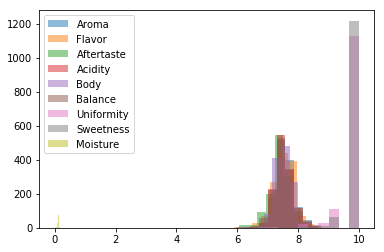

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

scores = ['Aroma','Flavor', 'Aftertaste', 'Acidity', 'Body',
            'Balance', 'Uniformity', 'Sweetness','Moisture']

for feature in scores:
    plt.hist(CQI_dataset[feature] ,bins = 30,alpha = 0.5,label= feature)

plt.legend(loc = 'upper left')
plt.rcParams["figure.figsize"]=[25,25]
plt.show()

Body, sweetness, uniformity and moisture seem largly redundant so lets remove these and see what the spread looks like

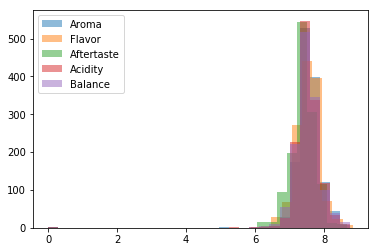

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

scores = ['Aroma','Flavor', 'Aftertaste', 'Acidity', 'Balance']

for feature in scores:
    plt.hist(CQI_dataset[feature] ,bins = 30,alpha = 0.5,label= feature)

plt.legend(loc = 'upper left')
plt.rcParams["figure.figsize"]=[250,250]
plt.show()